<a href="https://colab.research.google.com/github/lokesssh/DSML/blob/main/hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.stats import norm
import numpy as np

p_value = norm.cdf(-1.74)
p_value

np.float64(0.040929508978807365)

In [ ]:
p_value = norm.cdf(-0.54)
p_value

np.float64(0.294598516215698)

In [ ]:
from scipy.stats import ttest_ind,ttest_1samp
plant_a = np.random.normal(loc=2.87, scale=1.08, size=150)
plant_b = np.random.normal(loc=2.56, scale=1.28, size=200)

t_stat, p_val = ttest_ind(plant_a, plant_b, alternative='less')
print(p_val)

0.9997771886505247


import pandas as pd

1.   List item
2.   List item


df = pd.read_csv('Sachin_ODI.csv')
df.head()

In [ ]:
import pandas as pd
df = pd.read_csv('Sachin_ODI.csv')
df.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False


In [ ]:
df_first_innings = df[df['Inns']==1]

df_second_innings = df[df['Inns']==2]

In [ ]:
from scipy.stats import ttest_ind,ttest_1samp

t_score,p_score = ttest_ind(df_first_innings['runs'],df_second_innings['runs'],alternative='greater')
p_score

np.float64(0.07241862097379981)

In [ ]:
from scipy.stats import norm
p_value = 1-norm.cdf(4.71)
p_value

np.float64(1.2385839573969548e-06)

In [ ]:
female_scores=[25,30,45,49,47,35,32,42]

male_scores=[45,47,25,22,29,32,27,28,40,49,50,33]

from scipy.stats import ttest_ind,ttest_1samp
t_score,p_value = ttest_ind(female_scores,male_scores,alternative='greater')
p_value

np.float64(0.2847023809445894)

## Anova and chisquare


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## anova eligibility
# 1) gaussian distribution
To check whether a distribution is gaussian or not we use 3 methods

1.   qqplot( more of a visualization aspect)
2.   shapiro ( works only for small sets typically 50-200 records )
3.   Kstest ( works only for small sets typically 50-200 records )


<Axes: xlabel='Height', ylabel='Count'>

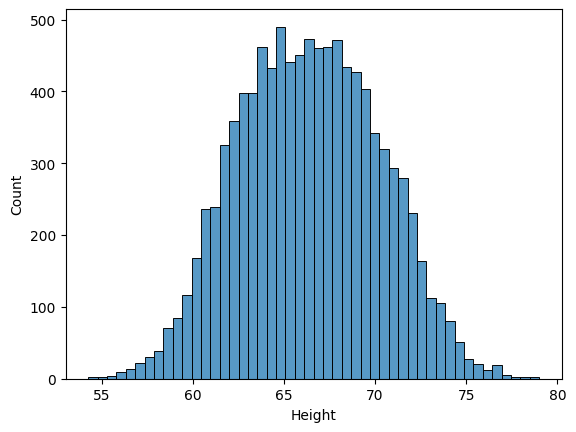

In [ ]:
height = df['Height']
sns.histplot(height)

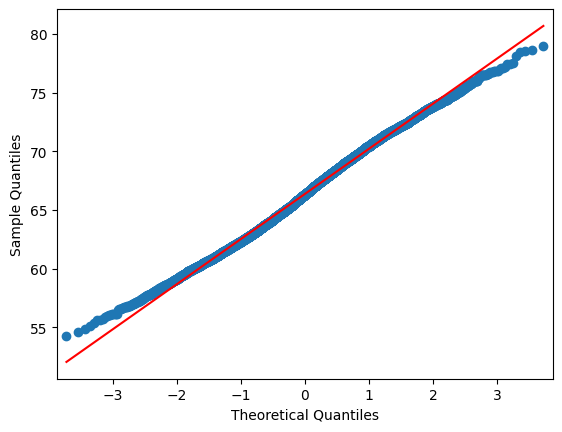

In [ ]:
import statsmodels.api as sm
sm.qqplot(height,line='s')
plt.show()

In [ ]:
#H0:data is gaussian
#H1:data is not gaussian

from scipy.stats import shapiro
height_subset = height.sample(100)
test_stat,p_value = shapiro(height_subset)
if p_value<0.5:
  print('gaussian')
else:
  print('not gaussian')

gaussian


In [ ]:
#H0:data is gaussian
#H1:data is not gaussian
from scipy.stats import norm,kstest

mu = height_subset.mean()
std = height_subset.std()
test_stat,p_value = kstest(
    height_subset,
    norm.cdf,
    args=(mu,std)
)
print(p_value)


0.9448705990088809


## Variace across groups


<Axes: xlabel='Height', ylabel='Count'>

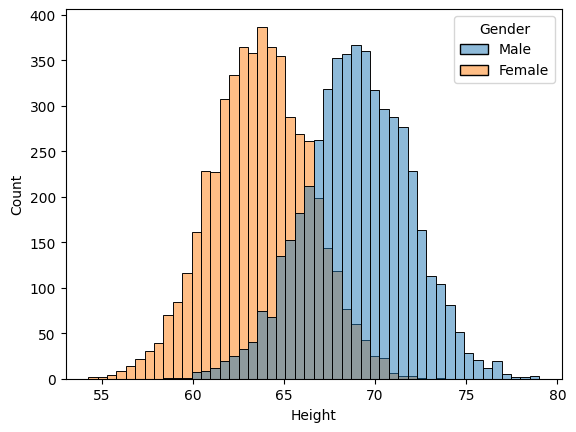

In [ ]:
sns.histplot(df,x='Height',hue='Gender')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: xlabel='Height', ylabel='Weight'>

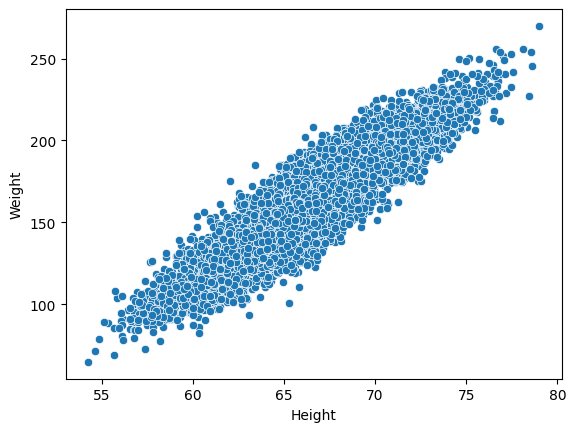

In [ ]:
df_height = df['Height']
df_weight = df['Weight']
sns.scatterplot(x=df_height,y=df_weight)

In [ ]:
from scipy.stats import ttest_rel
before = [2.45, 0.69, 1.80, 2.80, 0.07, 1.67, 2.93, 0.47, 1.45, 1.34]

after = [7.71, 2.17, 5.65, 8.79, 0.23, 5.23, 9.19, 1.49, 4.56, 4.20]

tscore,p_value = ttest_rel(before,after,alternative='greater')
print(tscore)
p_value

-5.111096450191605


np.float64(0.9996822188018052)

In [7]:
from scipy.stats import ttest_rel,chi2_contingency,chisquare
observed = [73,38,18]
expected = [77.4, 36.12, 15.48]
p_value = chisquare(observed,expected)
p_value


Power_divergenceResult(statistic=np.float64(0.7582133628645265), pvalue=np.float64(0.684472588255113))

In [8]:
from scipy.stats import f_oneway

m1 = [8, 9, 11, 12]
m2 = [6, 8, 10, 4]
m3 = [14, 12, 18, 9]
m4 = [20, 22, 25, 23]

f_stat, p_value = f_oneway(m1, m2, m3, m4)

print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H0: There is a significant difference between machines.")
else:
    print("Fail to reject H0: No significant difference between machines.")

F-statistic: 25.2216
p-value: 0.0000
Reject H0: There is a significant difference between machines.


In [9]:
from scipy.stats import f_oneway

Saurav = [300, 400, 300, 500, 50]
Naveen = [600, 300, 300, 400]
Radha = [700, 300, 400, 600, 500]

f_stat, p_value = f_oneway(Saurav, Naveen, Radha)

print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H0: There is a significant difference in average sales.")
else:
    print("Fail to reject H0: No significant difference in average sales.")

F-statistic: 1.8264
p-value: 0.2066
Fail to reject H0: No significant difference in average sales.
